# 01 – Data Preprocessing

 1. Import Libraries

In [1]:
import os, numpy as np, pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

2. Load Dataset

In [2]:
DATA_PATH = Path("C:/Users/youss/Desktop/Heart_Disease_Project/data/heart_disease.csv")

df = pd.read_csv(DATA_PATH)

print(" First 5 rows:\n", df.head())
print("\n Info:\n")
print(df.info())
print("\n Summary Statistics:\n", df.describe())

 First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

 Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      

3. Data Cleaning

In [3]:
df = df.drop_duplicates()
print("\n Missing values per column:\n", df.isnull().sum())


 Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


4. Data Preprocessing (Encoding + Scaling)

In [4]:
# target column
target = 'target' if 'target' in df.columns else df.columns[-1]
X = df.drop(columns=[target])
y = df[target]

# separate numeric and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("\n Numeric columns:", num_cols)
print(" Categorical columns:", cat_cols)

# pipelines for preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n Train shape: {X_train.shape}, Test shape: {X_test.shape}")



 Numeric columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
 Categorical columns: []

 Train shape: (241, 13), Test shape: (61, 13)


5. Exploratory Data Analysis (EDA)


 EDA plots saved in ../results/


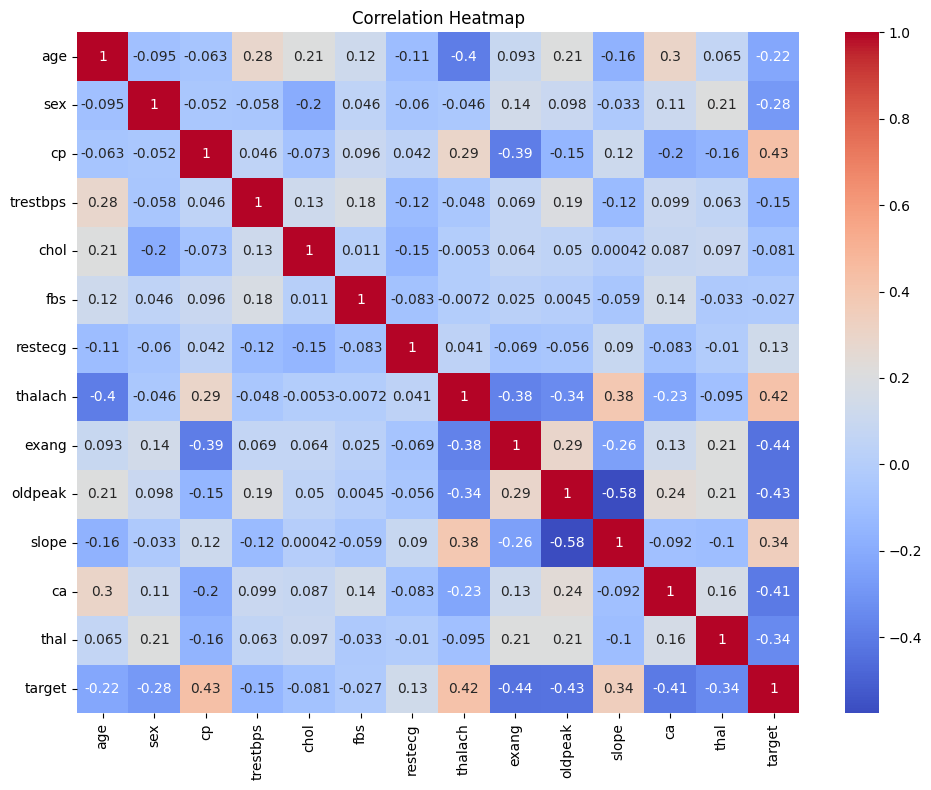

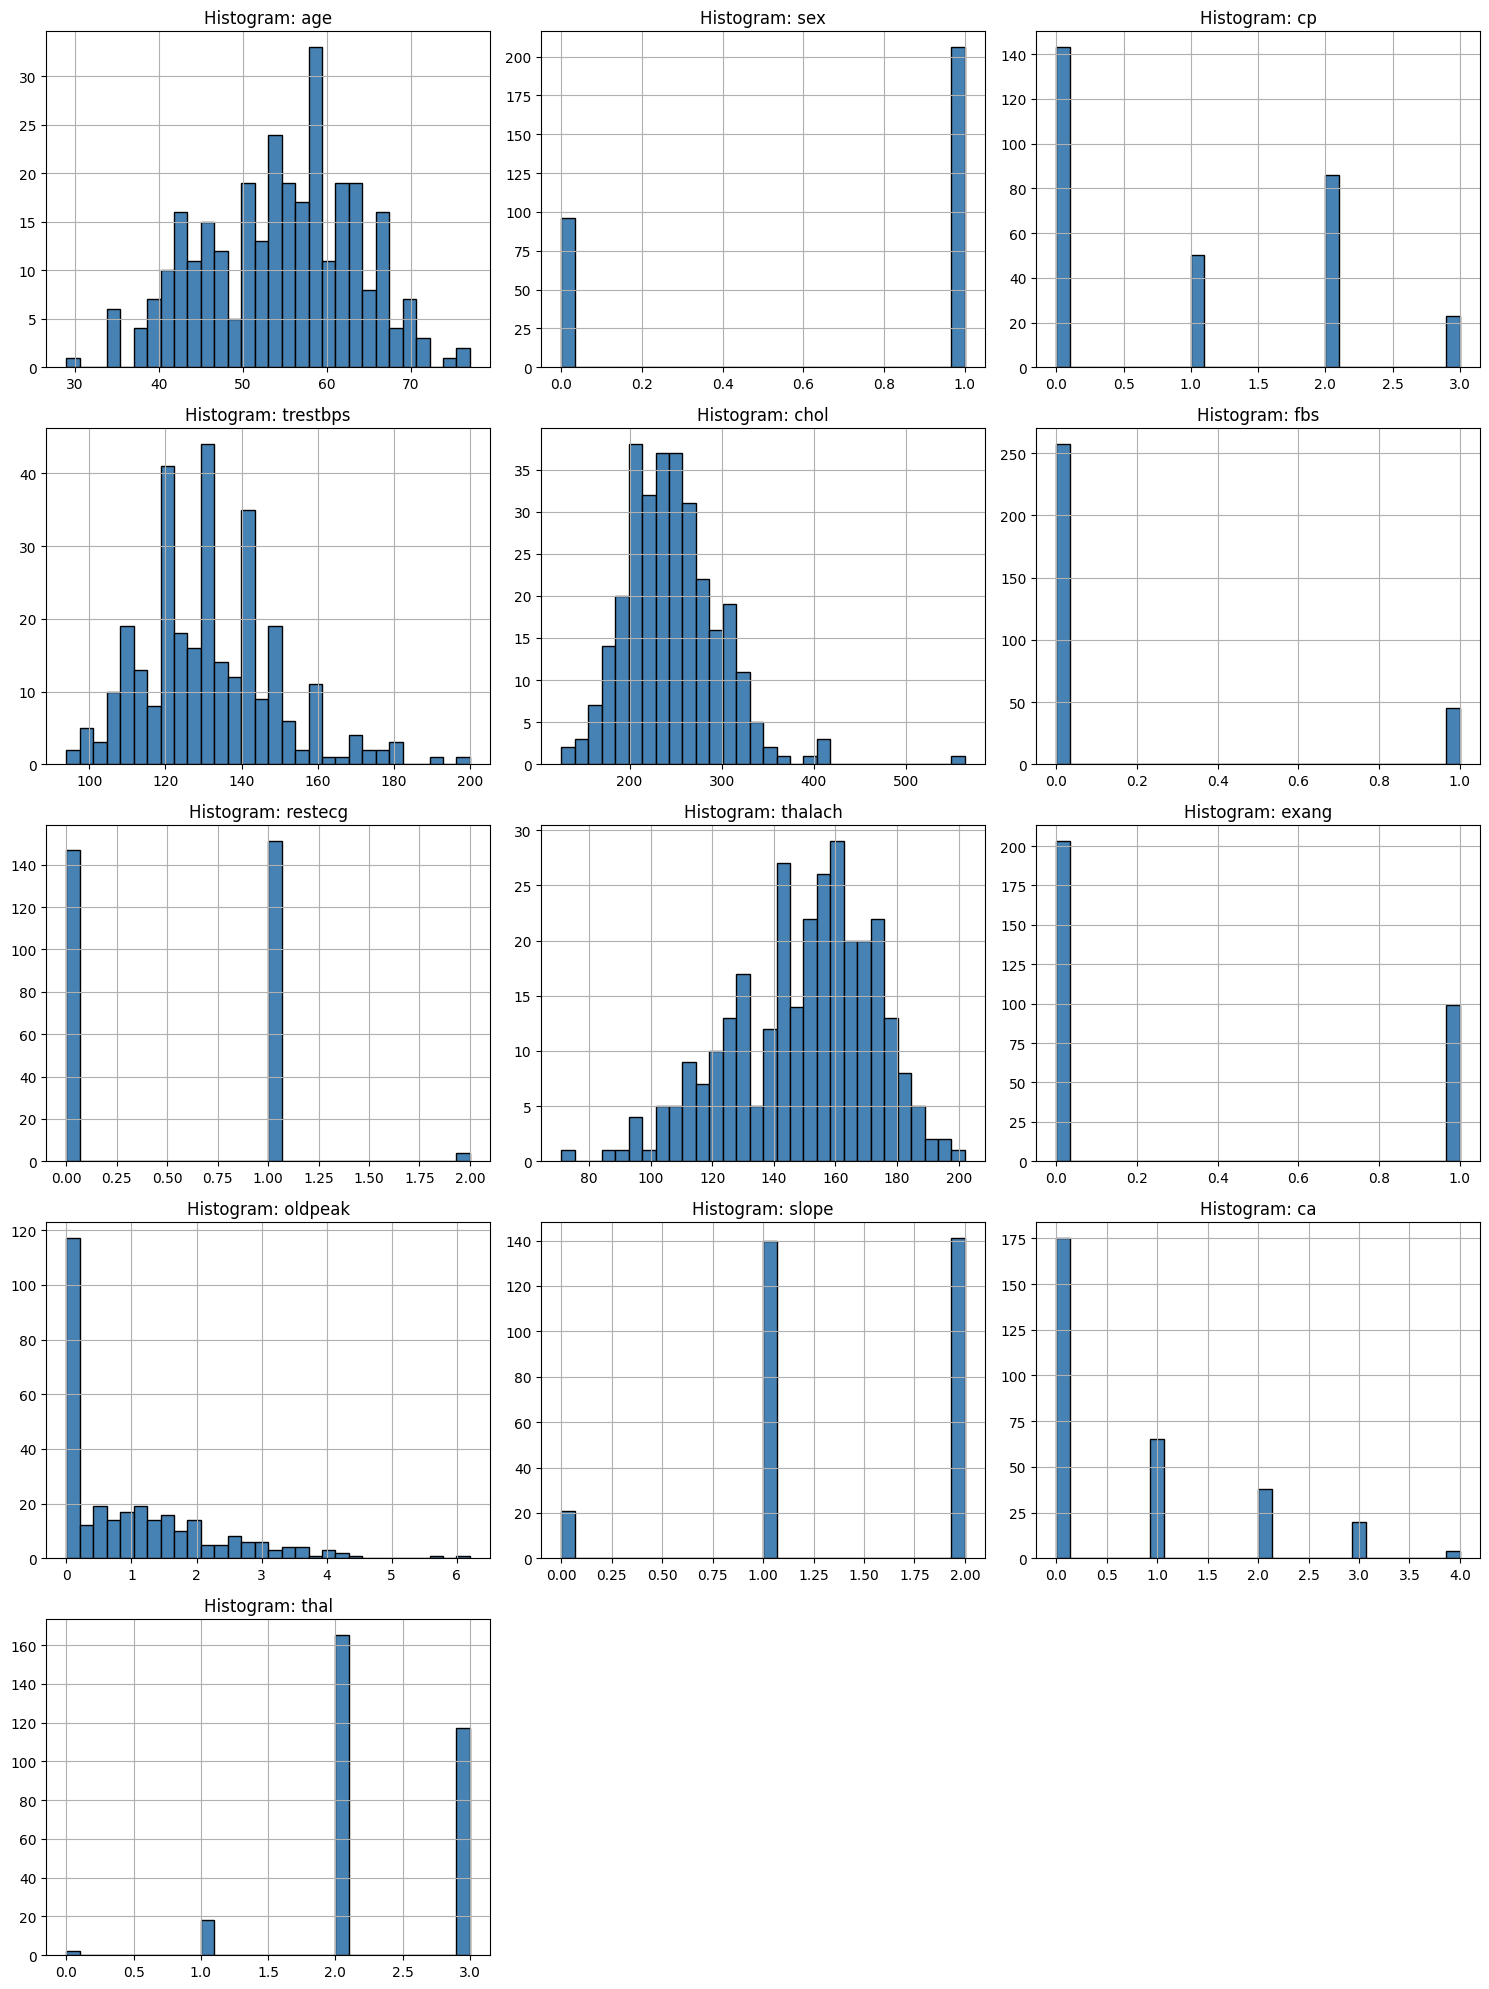

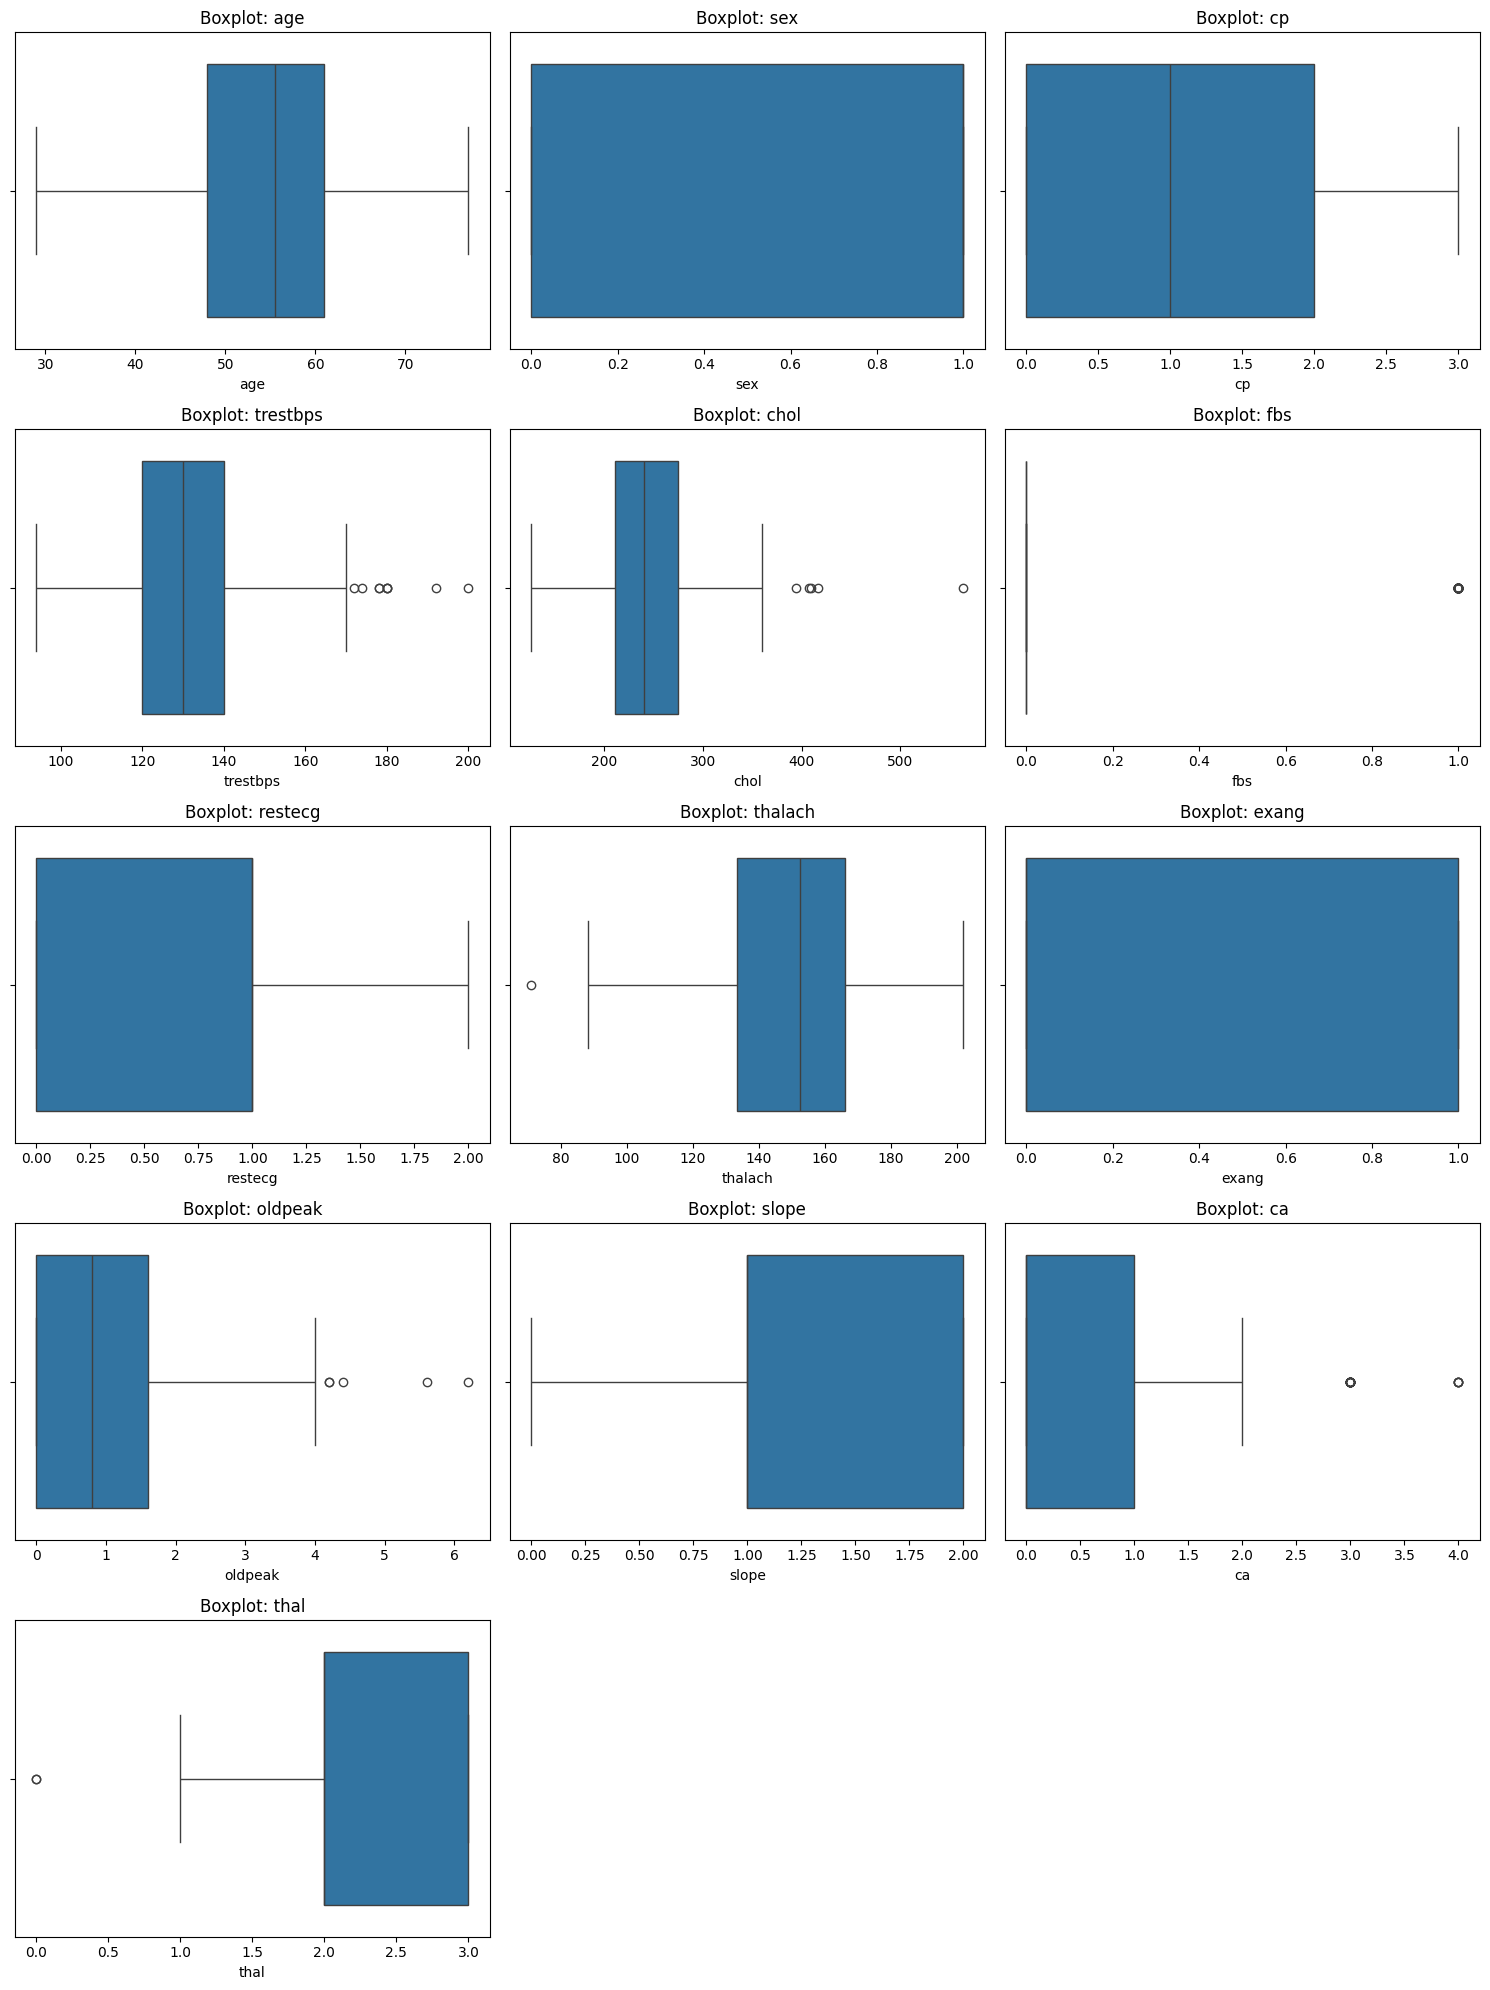

In [5]:
# create results folder
os.makedirs("../results", exist_ok=True)

#  correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("../results/correlation_heatmap.png")

# histograms in grid
n_num = len(num_cols)
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(n_num / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    df[col].hist(bins=30, color="steelblue", edgecolor="black", ax=axes[i])
    axes[i].set_title(f"Histogram: {col}")

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("../results/histograms_grid.png")

# boxplots in grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot: {col}")

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("../results/boxplots_grid.png")

print("\n EDA plots saved in ../results/")